In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define a single consistent path to the final dataset
file_path = '../data/cleaned/final_dataset.csv'

# Make sure the directory exists (helps avoid errors when saving later)
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Load all cleaned datasets 
patients_cleaned = pd.read_csv('../data/cleaned/patients_cleaned.csv')
doctors_cleaned = pd.read_csv('../data/cleaned/doctors_cleaned.csv')
visits_cleaned = pd.read_csv('../data/cleaned/visits_cleaned.csv')
billing_cleaned = pd.read_csv('../data/cleaned/billing_cleaned.csv')

# Load the final dataset (only once)
final_dataset = pd.read_csv(file_path)

# Show first 5 rows of final_dataset to verify loading
final_dataset.head()


,visit_id,patient_id,doctor_id,visit_date,reason,diagnosis,prescription,cost,first_name,last_name,...,name,specialization,billing_id,insurance_provider,amount_paid,payment_date,days_since_last_visit,readmission,insurance_status,payment_diff
0,171,1,27,2024-08-02,Back pain,Injury,Blood test required,2914,Trumann,Chasmoor,...,Lilyan Sahnow,Endocrinology,171,Aetna,2656.09,2024-08-28,NaN,0,Insured,257.91
1,511,2,12,2023-08-06,Diabetes management,Injury,Start insulin,2103,Kyle,Easton,...,Crawford Gumary,Endocrinology,511,Self-Pay,1923.48,2023-08-29,NaN,0,Self-Pay,179.52
2,931,3,39,2024-07-04,Back pain,Flu,Prescribed antibiotics,3127,Ardelia,Drohun,...,Euphemia Dongles,Endocrinology,931,Cigna,2846.72,2024-07-17,NaN,0,Insured,280.28
3,424,4,23,2023-02-11,Diabetes management,Flu,Take rest and fluids,1468,Haze,Brittles,...,Edlin Connelly,Endocrinology,424,Aetna,1230.91,2023-02-18,NaN,0,Insured,237.09
4,301,4,28,2023-07-21,Routine Checkup,Injury,Start insulin,542,Haze,Brittles,...,Friedrich Lemerie,Psychiatry,301,Aetna,467.98,2023-08-02,160.0,0,Insured,74.02


In [17]:
final_dataset.columns.tolist()


['visit_id',
 'patient_id',
 'doctor_id',
 'visit_date',
 'reason',
 'diagnosis',
 'prescription',
 'cost',
 'first_name',
 'last_name',
 'gender',
 'date_of_birth',
 'email',
 'name',
 'specialization',
 'billing_id',
 'insurance_provider',
 'amount_paid',
 'payment_date',
 'days_since_last_visit',
 'readmission',
 'insurance_status',
 'payment_diff']

In [19]:
final_dataset.isnull().sum()


visit_id                   0
patient_id                 0
doctor_id                  0
visit_date                 0
reason                     0
diagnosis                  0
prescription               0
cost                       0
first_name                 0
last_name                  0
gender                     0
date_of_birth              0
email                      0
name                       0
specialization             0
billing_id                 0
insurance_provider         0
amount_paid                0
payment_date               0
days_since_last_visit    445
readmission                0
insurance_status           0
payment_diff               0
dtype: int64

In [ ]:
final_dataset.head()


In [21]:
final_dataset['name'].head()


0        Lilyan Sahnow
1      Crawford Gumary
2     Euphemia Dongles
3       Edlin Connelly
4    Friedrich Lemerie
Name: name, dtype: object

In [23]:
final_dataset.shape


(1000, 23)

In [25]:
final_dataset.isnull().sum()


visit_id                   0
patient_id                 0
doctor_id                  0
visit_date                 0
reason                     0
diagnosis                  0
prescription               0
cost                       0
first_name                 0
last_name                  0
gender                     0
date_of_birth              0
email                      0
name                       0
specialization             0
billing_id                 0
insurance_provider         0
amount_paid                0
payment_date               0
days_since_last_visit    445
readmission                0
insurance_status           0
payment_diff               0
dtype: int64

In [27]:
final_dataset.duplicated().sum()


0

In [29]:
# Preview Doctors and Diagnosis column now

final_dataset[['name', 'diagnosis']].head()


,name,diagnosis
0,Lilyan Sahnow,Injury
1,Crawford Gumary,Injury
2,Euphemia Dongles,Flu
3,Edlin Connelly,Flu
4,Friedrich Lemerie,Injury


In [31]:
# Create new Dataset to Count Diagnosis Per Doctor

diagnoses_per_doctor = final_dataset.groupby(['name', 'diagnosis']).size().reset_index(name='count')


In [33]:
diagnoses_per_doctor.head(10)


,name,diagnosis,count
0,Abel Notman,Allergy,4
1,Abel Notman,Asthma,4
2,Abel Notman,Diabetes,3
3,Abel Notman,Flu,4
4,Abel Notman,Hypertension,3
5,Abel Notman,Infection,2
6,Abel Notman,Injury,4
7,Aguste Kneebone,Allergy,1
8,Aguste Kneebone,Asthma,6
9,Aguste Kneebone,Diabetes,3


In [35]:
diag_counts = final_dataset.groupby(['name', 'diagnosis']).size().reset_index(name='count')
diag_counts_sorted = diag_counts.sort_values(['name', 'count'], ascending=[True, False])



In [37]:
top_diag_per_doctor = diag_counts_sorted.groupby('name').first().reset_index()


In [39]:
top_diag_per_doctor.head()

,name,diagnosis,count
0,Abel Notman,Allergy,4
1,Aguste Kneebone,Infection,10
2,Alaster Hanna,Allergy,5
3,Albie Meeron,Injury,7
4,Alvy Scutt,Diabetes,5


In [41]:
# Each Doctor's Top Diagnosis

top_diag_per_doctor = diag_counts.loc[diag_counts.groupby('name')['count'].idxmax()]
print(top_diag_per_doctor.head())



               name  diagnosis  count
0       Abel Notman    Allergy      4
12  Aguste Kneebone  Infection     10
14    Alaster Hanna    Allergy      5
26     Albie Meeron     Injury      7
29       Alvy Scutt   Diabetes      5


In [43]:
top_diag_summary = top_diag_per_doctor['diagnosis'].value_counts().reset_index()
top_diag_summary.columns = ['diagnosis', 'doctor_count']
print(top_diag_summary)


      diagnosis  doctor_count
0       Allergy            13
1      Diabetes             7
2           Flu             7
3        Asthma             7
4  Hypertension             7
5        Injury             5
6     Infection             4


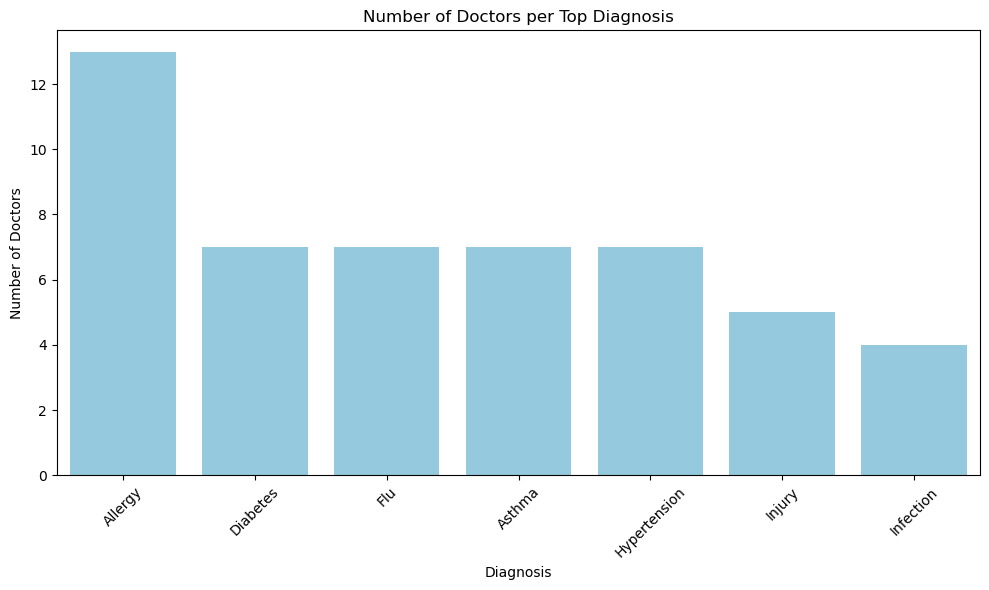

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_diag_summary, x='diagnosis', y='doctor_count', color='skyblue')

plt.title('Number of Doctors per Top Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Doctors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Readmission

In [48]:
# Make sure visit_date is in datetime format
final_dataset['visit_date'] = pd.to_datetime(final_dataset['visit_date'])


# Sort by patient_id and visit_date to calculate time between visits
final_dataset = final_dataset.sort_values(by=['patient_id', 'visit_date'])



In [50]:
# Calculate days since last visit for each patient
final_dataset['days_since_last_visit'] = final_dataset.groupby('patient_id')['visit_date'].diff().dt.days



In [52]:
final_dataset.columns


Index(['visit_id', 'patient_id', 'doctor_id', 'visit_date', 'reason',
       'diagnosis', 'prescription', 'cost', 'first_name', 'last_name',
       'gender', 'date_of_birth', 'email', 'name', 'specialization',
       'billing_id', 'insurance_provider', 'amount_paid', 'payment_date',
       'days_since_last_visit', 'readmission', 'insurance_status',
       'payment_diff'],
      dtype='object')

In [54]:
final_dataset[['patient_id', 'visit_date', 'days_since_last_visit']].head(10)


,patient_id,visit_date,days_since_last_visit
0,1,2024-08-02,NaN
1,2,2023-08-06,NaN
2,3,2024-07-04,NaN
3,4,2023-02-11,NaN
4,4,2023-07-21,160.0
5,4,2023-08-30,40.0
6,4,2024-10-10,407.0
7,6,2022-10-20,NaN
8,6,2023-07-03,256.0
9,6,2023-10-24,113.0


In [56]:
print(final_dataset.columns)


Index(['visit_id', 'patient_id', 'doctor_id', 'visit_date', 'reason',
       'diagnosis', 'prescription', 'cost', 'first_name', 'last_name',
       'gender', 'date_of_birth', 'email', 'name', 'specialization',
       'billing_id', 'insurance_provider', 'amount_paid', 'payment_date',
       'days_since_last_visit', 'readmission', 'insurance_status',
       'payment_diff'],
      dtype='object')


In [58]:
# Mark as 1 if the patient returned within 30 days; otherwise 0
# NaN means it's their first visit — not a readmission
final_dataset['readmission'] = np.where(
    (final_dataset['days_since_last_visit'].notna()) & 
    (final_dataset['days_since_last_visit'] <= 30),
    1,
    0
)

# Check the new column
final_dataset[['patient_id', 'visit_date', 'days_since_last_visit', 'readmission']].head(10)


,patient_id,visit_date,days_since_last_visit,readmission
0,1,2024-08-02,NaN,0
1,2,2023-08-06,NaN,0
2,3,2024-07-04,NaN,0
3,4,2023-02-11,NaN,0
4,4,2023-07-21,160.0,0
5,4,2023-08-30,40.0,0
6,4,2024-10-10,407.0,0
7,6,2022-10-20,NaN,0
8,6,2023-07-03,256.0,0
9,6,2023-10-24,113.0,0


# Check if Insurance Status affects Amounts Paid

In [61]:
final_dataset['insurance_provider'] = final_dataset['insurance_provider'].fillna('Self-Pay')
final_dataset['insurance_status'] = final_dataset['insurance_provider'].apply(lambda x: 'Insured' if x != 'Self-Pay' else 'Self-Pay')
final_dataset.groupby('insurance_status')['amount_paid'].mean()

insurance_status = final_dataset['insurance_status'].value_counts()
print(insurance_status)


insurance_status
Insured     793
Self-Pay    207
Name: count, dtype: int64


C:\Users\szeer\AppData\Local\Temp\ipykernel_14744\3754008110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=insurance_counts.index, y=insurance_counts.values, palette='pastel')


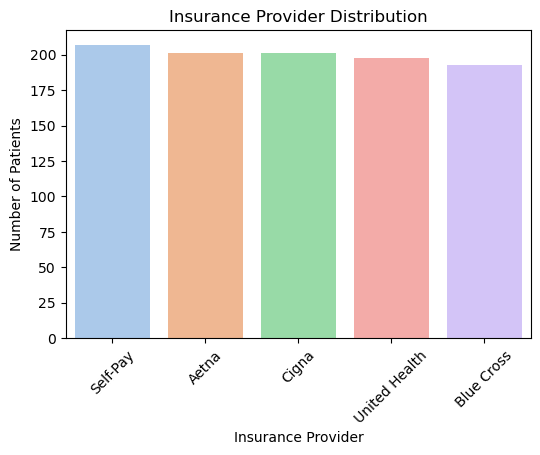

In [63]:
# Count of insurance status
insurance_counts = final_dataset['insurance_provider'].fillna('Self-Pay').value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=insurance_counts.index, y=insurance_counts.values, palette='pastel')
plt.title('Insurance Provider Distribution')
plt.ylabel('Number of Patients')
plt.xlabel('Insurance Provider')
plt.xticks(rotation=45)
plt.show()


In [65]:
# Add a column to check payment status
final_dataset['payment_diff'] = final_dataset['cost'] - final_dataset['amount_paid']

# Summary stats on payment differences
print(final_dataset['payment_diff'].describe())

# Count of fully paid, partially paid, and unpaid bills
payment_status_counts = pd.cut(
    final_dataset['payment_diff'], 
    bins=[-1, 0, final_dataset['payment_diff'].max()], 
    labels=['Fully Paid or Overpaid', 'Partial/Unpaid']
).value_counts()

print(payment_status_counts)


count    1000.000000
mean      251.575940
std       222.507711
min         0.310000
25%        69.162500
50%       191.555000
75%       384.140000
max       950.920000
Name: payment_diff, dtype: float64
payment_diff
Partial/Unpaid            1000
Fully Paid or Overpaid       0
Name: count, dtype: int64


In [67]:
payment_by_insurance = final_dataset.groupby('insurance_provider')['payment_diff'].agg(['mean', 'count'])
print(payment_by_insurance)


                          mean  count
insurance_provider                   
Aetna               230.381144    201
Blue Cross          305.761710    193
Cigna               256.648159    201
Self-Pay            251.875990    207
United Health       214.811667    198


In [69]:
insurance_summary = final_dataset.groupby('insurance_provider')['payment_diff'].agg(['mean', 'count']).reset_index()


C:\Users\szeer\AppData\Local\Temp\ipykernel_14744\3323482857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=insurance_summary, x='insurance_provider', y='mean', palette='pastel')


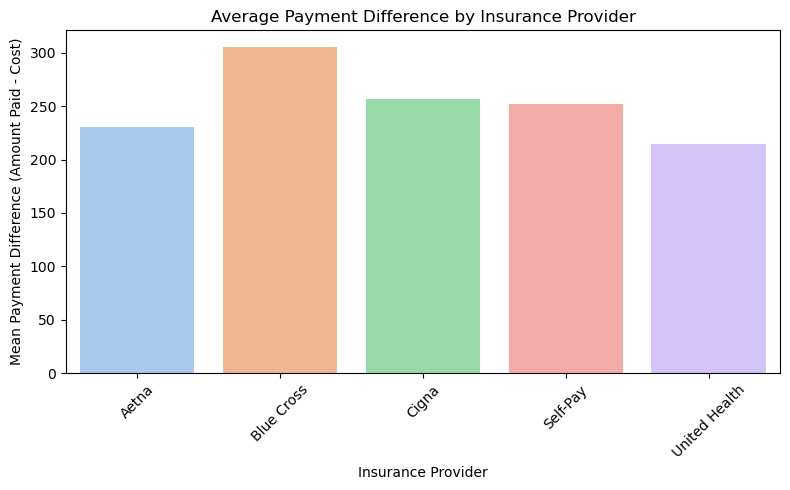

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(data=insurance_summary, x='insurance_provider', y='mean', palette='pastel')
plt.title('Average Payment Difference by Insurance Provider')
plt.ylabel('Mean Payment Difference (Amount Paid - Cost)')
plt.xlabel('Insurance Provider')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
final_dataset.head()

,visit_id,patient_id,doctor_id,visit_date,reason,diagnosis,prescription,cost,first_name,last_name,...,name,specialization,billing_id,insurance_provider,amount_paid,payment_date,days_since_last_visit,readmission,insurance_status,payment_diff
0,171,1,27,2024-08-02,Back pain,Injury,Blood test required,2914,Trumann,Chasmoor,...,Lilyan Sahnow,Endocrinology,171,Aetna,2656.09,2024-08-28,NaN,0,Insured,257.91
1,511,2,12,2023-08-06,Diabetes management,Injury,Start insulin,2103,Kyle,Easton,...,Crawford Gumary,Endocrinology,511,Self-Pay,1923.48,2023-08-29,NaN,0,Self-Pay,179.52
2,931,3,39,2024-07-04,Back pain,Flu,Prescribed antibiotics,3127,Ardelia,Drohun,...,Euphemia Dongles,Endocrinology,931,Cigna,2846.72,2024-07-17,NaN,0,Insured,280.28
3,424,4,23,2023-02-11,Diabetes management,Flu,Take rest and fluids,1468,Haze,Brittles,...,Edlin Connelly,Endocrinology,424,Aetna,1230.91,2023-02-18,NaN,0,Insured,237.09
4,301,4,28,2023-07-21,Routine Checkup,Injury,Start insulin,542,Haze,Brittles,...,Friedrich Lemerie,Psychiatry,301,Aetna,467.98,2023-08-02,160.0,0,Insured,74.02


In [77]:
final_dataset.columns

Index(['visit_id', 'patient_id', 'doctor_id', 'visit_date', 'reason',
       'diagnosis', 'prescription', 'cost', 'first_name', 'last_name',
       'gender', 'date_of_birth', 'email', 'name', 'specialization',
       'billing_id', 'insurance_provider', 'amount_paid', 'payment_date',
       'days_since_last_visit', 'readmission', 'insurance_status',
       'payment_diff'],
      dtype='object')

In [79]:
final_dataset[['patient_id', 'visit_date', 'days_since_last_visit', 'readmission']].head(10)


,patient_id,visit_date,days_since_last_visit,readmission
0,1,2024-08-02,NaN,0
1,2,2023-08-06,NaN,0
2,3,2024-07-04,NaN,0
3,4,2023-02-11,NaN,0
4,4,2023-07-21,160.0,0
5,4,2023-08-30,40.0,0
6,4,2024-10-10,407.0,0
7,6,2022-10-20,NaN,0
8,6,2023-07-03,256.0,0
9,6,2023-10-24,113.0,0


In [81]:
final_dataset[['visit_date', 'days_since_last_visit', 'readmission']].head()


,visit_date,days_since_last_visit,readmission
0,2024-08-02,NaN,0
1,2023-08-06,NaN,0
2,2024-07-04,NaN,0
3,2023-02-11,NaN,0
4,2023-07-21,160.0,0


In [97]:
# Ensure visit_date is datetime
final_dataset['visit_date'] = pd.to_datetime(final_dataset['visit_date'])

# Calculate age
final_dataset['age'] = final_dataset['visit_date'].dt.year - pd.to_datetime(final_dataset['date_of_birth']).dt.year

# Optional: handle negative ages or unrealistic values
final_dataset = final_dataset[final_dataset['age'] >= 0]

In [105]:
# Make sure the target folder exists
os.makedirs("data/cleaned", exist_ok=True)

# Save updated final_dataset
# final_dataset.to_csv("data/cleaned/final_dataset.csv", index=False)
final_dataset.to_csv(file_path, index=False)


# Double-check by reading the file back immediately
pd.read_csv("data/cleaned/final_dataset.csv")[['visit_date', 'days_since_last_visit', 'readmission', 'age']].head()


,visit_date,days_since_last_visit,readmission,age
0,2024-08-02,NaN,0,38
1,2023-08-06,NaN,0,58
2,2024-07-04,NaN,0,11
3,2023-02-11,NaN,0,47
4,2023-07-21,160.0,0,47
